In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the data
df_train = pd.read_csv('Training_data/train_data.csv')
df_test = pd.read_csv('Training_data/test_data.csv')

In [4]:
df_train.head()

,B2,B3,B4,B8,class_3,class_2,.geo,Contributor,coordinates
0,1122.0,1440.0,1754.0,1960.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",NK,"[146.5644056016995, -38.182756404207645]"
1,450.0,766.0,1002.0,2248.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",EG,"[144.29930361279213, -36.75695038525314]"
2,1323.0,1322.0,1153.0,1464.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[152.34102203623007, -27.554339120147525]"
3,991.0,1278.0,1672.0,2608.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.7278852605637, -37.910746536176255]"
4,1182.0,1596.0,2192.0,3113.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.8925464521428, -37.95476398509811]"


In [5]:
df_train = df_train[['B2', 'B3', 'B4', 'B8', 'class_3']]

In [6]:
df_test = df_test[['B2', 'B3', 'B4', 'B8', 'class_3']]

In [7]:
df_train.head()

,B2,B3,B4,B8,class_3
0,1122.0,1440.0,1754.0,1960.0,2
1,450.0,766.0,1002.0,2248.0,2
2,1323.0,1322.0,1153.0,1464.0,0
3,991.0,1278.0,1672.0,2608.0,1
4,1182.0,1596.0,2192.0,3113.0,1


In [8]:
df_train_y = df_train['class_3']
df_train_x = df_train[['B2', 'B3', 'B4', 'B8']]

df_test_y = df_test['class_3']
df_test_x = df_test[['B2', 'B3', 'B4', 'B8']]

In [9]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

col_names = df_train_x.columns
df_train_x = pd.DataFrame(scaler.fit_transform(df_train_x), columns = col_names)
df_test_x = pd.DataFrame(scaler.transform(df_test_x), columns = col_names)

In [10]:
df_test_x.head()

,B2,B3,B4,B8
0,-1.084530,-0.808724,-1.292489,1.475734
1,0.287863,0.284545,0.358227,-0.065508
2,0.034651,-0.016340,0.035810,0.082688
3,-0.745639,-0.804786,-0.814063,0.079865
4,-0.790773,-0.873312,-1.226371,0.072103


### Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 150, 200, 300, 500, 700, 1000, 1500, 2000],
         'learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.5],
         'subsample': [0.25, 0.5, 0.75, 1]}

gb = GradientBoostingClassifier(random_state=42, init='zero')
clf = GridSearchCV(gb, params, n_jobs = -1, scoring = 'accuracy', verbose=10)

clf.fit(df_train_x, df_train_y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=GradientBoostingClassifier(init='zero', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500, 700, 1000,
                                          1500, 2000],
                         'subsample': [0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=10)

In [50]:
clf.best_params_

{'learning_rate': 0.2, 'n_estimators': 700, 'subsample': 0.75}

In [51]:
clf.best_score_

0.8131939365820797

### Gradient Boosting Ensemble Model

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(n_estimators=700, subsample = 0.75, random_state=42, init='zero', learning_rate=0.2)

gb_clf.fit(df_train_x, df_train_y)

y_pred_gb = gb_clf.predict(df_test_x)
print(accuracy_score(df_test_y, y_pred_gb))

0.826007326007326


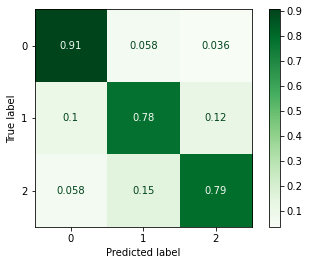

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gb_clf, df_test_x, df_test_y, cmap='Greens', normalize='true')
plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(df_test_y, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       364
           1       0.79      0.78      0.78       364
           2       0.84      0.79      0.82       364

    accuracy                           0.83      1092
   macro avg       0.83      0.83      0.83      1092
weighted avg       0.83      0.83      0.83      1092

